[View in Colaboratory](https://colab.research.google.com/github/scubamut/backtests/blob/master/+_ALL_STRATEGIES.ipynb)

# ALL **STRATEGIES**

# Install and Import

In [1]:
from __future__ import print_function

!pip install git+https://github.com/scubamut/fintools.git
!pip install cvxopt
!pip install pyfolio
!pip install ffn
!pip install itable

!pip install git+https://github.com/pydata/pandas-datareader.git


  Cloning https://github.com/scubamut/fintools.git to /tmp/pip-req-build-81w8s5l4
  Running setup.py bdist_wheel for fintools ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-vhhj__1k/wheels/31/8c/f2/b804e06272798f0f915e278c6e44fe46c927321835e506c256
Successfully built fintools
  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-ebk3wfon
  Running setup.py bdist_wheel for pandas-datareader ... -

 \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-03z3atox/wheels/5f/4c/e3/f9e4e92cb4498744a91d53d37b840fb1959c286bf660740040
Successfully built pandas-datareader


In [0]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import itable
import ffn

from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.compute_weights_PMA import compute_weights_PMA
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table

## **1. Strategy Details**

In [0]:
# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until today.

# start_date = '1986-01-01'
start_date = '2000-01-01'
# end_date = '2016-12-31'
end_date = datetime.today().strftime('%Y-%m-%d')

In [0]:
portfolios = {
    'RS0001': { 'symbols': ['VCVSX','VWEHX','VFIIX','FGOVX','VWAHX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 2, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0002': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,               
               'rs_lookback': 3, 'risk_lookback': 2, 'n_top': 1, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 0},
    'RS0003': {'symbols': ['MMHYX','FAGIX','VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 1, 'frequency': 'Q',
              'cash_proxy': 'CASHX', 'risk_free': 0},    
    'DM0001': {'symbols': ['VCVSX','VWINX','VWEHX','VGHCX','VUSTX','VFIIX','VWAHX','FGOVX','FFXSX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 3, 'frequency': 'M',
              'cash_proxy': 'CASHX', 'risk_free': 'FFXSX'},
    'DM0002': {'symbols': ['VCVSX','VUSTX','VWEHX','VFIIX','VGHCX','FRESX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'rs_lookback': 1, 'risk_lookback': 1, 'n_top': 5, 'frequency': 'M',
              'cash_proxy': 'VFIIX', 'risk_free': 'FFXSX'},
    'PMA001': {'symbols': ['VCVSX', 'VFIIX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,  
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.4],
              'cash_proxy': 'VUSTX'},
    'PMA002': {'symbols': ['VCVSX', 'VWINX', 'VWEHX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 3, 'frequency': 'M', 'allocations': [0.6, 0.2, 0.2],
              'cash_proxy': 'VUSTX'},
    'PMA003': {'symbols': ['VCVSX', 'FAGIX', 'VGHCX'], 
               'prices':data_source, 'start':start_date, 'end':end_date,
               'risk_lookback': 2, 'frequency': 'M', 'allocations': [1./3., 1./3., 1./3.],
              'cash_proxy': 'VUSTX'}
    }

## **2. Select a strategy and run**

Strategy : RS0001
FIRST BUY DATE = 1986-07-31 00:00:00



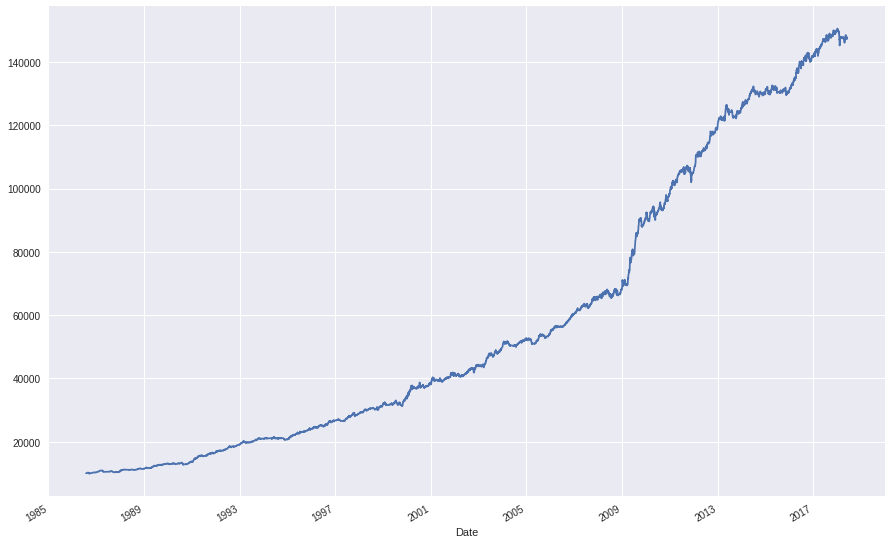

In [6]:
name = 'RS0001'

if 'PMA' in name :
    p_value, p_holdings, p_weights, prices =  compute_weights_PMA (name, portfolios[name])
else :
    p_value, p_holdings, p_weights, prices =  compute_weights_RS_DM (name, portfolios[name])
p_value.plot(figsize=(15, 10), grid=True)

In [7]:
ffn.calc_perf_stats(p_value).display()

Stats for None from 1986-07-31 00:00:00 - 2018-05-31 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
1376.37%            1.99  8.83%   -5.64%

Annualized Returns:
mtd    3m      6m      ytd     1y     3y     5y     10y    incep.
-----  ------  ------  ------  -----  -----  -----  -----  --------
0.46%  -0.13%  -1.12%  -1.71%  0.53%  3.69%  3.37%  8.16%  8.83%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.99     1.72       1.33
mean    8.55%    8.61%      8.87%
vol     4.29%    5.01%      6.67%
skew    -0.07    0.51       1.53
kurt    5.60     2.55       4.49
best    1.93%    8.13%      32.82%
worst   -2.74%   -3.83%     -1.71%

Drawdowns:
max     avg       # days
------  ------  --------
-5.64%  -0.72%     20.98

Misc:
---------------  ------
avg. up month    1.37%
avg. down month  -0.81%
up year %        93.75%
12m up %         98.39%

In [8]:
def highlight_pos_neg (s) :
    is_positive = s > 0    
    return ['background-color : rgb(127,255,0)' if v else 'background-color : rgb(255,99,71)' for v in is_positive]

df = monthly_return_table (p_value)

df.style.\
    apply(highlight_pos_neg)

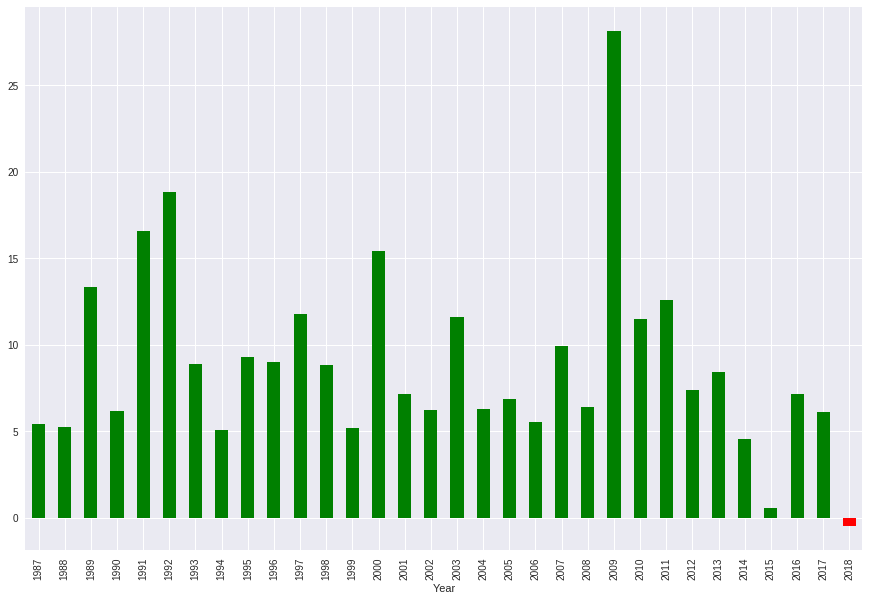

In [9]:
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# EACH STRATEGY SEPARATELY

Strategy : RS0001
FIRST BUY DATE = 1986-07-31 00:00:00



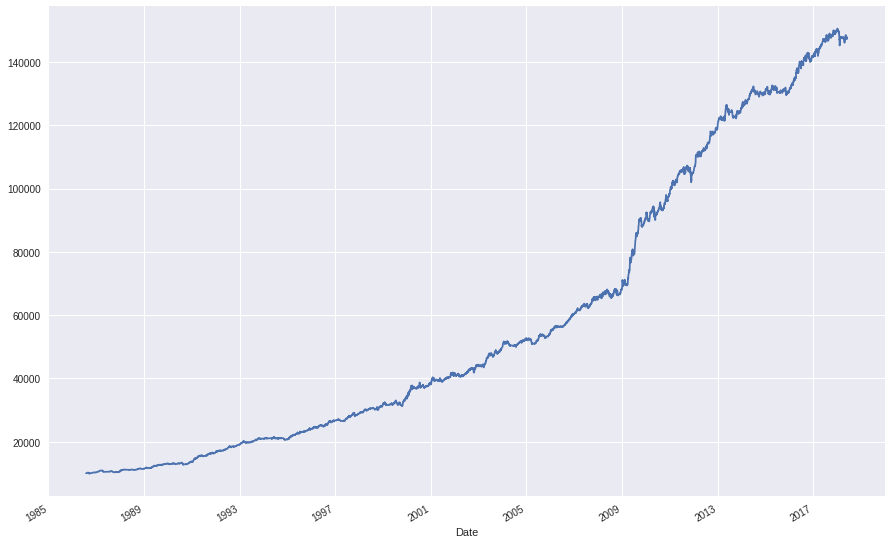

In [11]:
p_value1, p_holdings1, p_weights1, prices1  =  compute_weights_RS_DM ('RS0001', portfolios['RS0001'])
p_value1.plot(figsize=(15, 10), grid=True)

Strategy : RS0002
FIRST BUY DATE = 1986-04-30 00:00:00



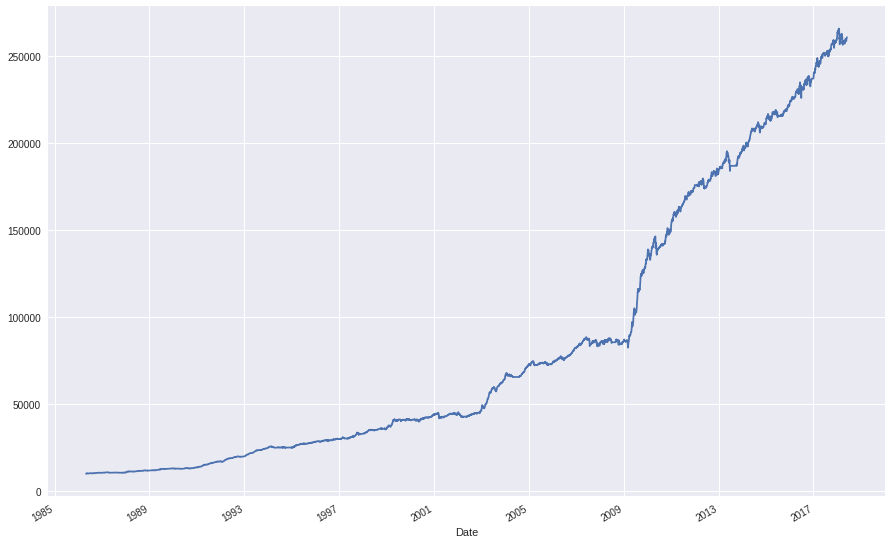

In [12]:
p_value2, p_holdings2, p_weights2, prices2  =  compute_weights_RS_DM ('RS0002', portfolios['RS0002'])
p_value2.plot(figsize=(15, 10), grid=True)

Strategy : RS0003
FIRST BUY DATE = 1986-04-30 00:00:00



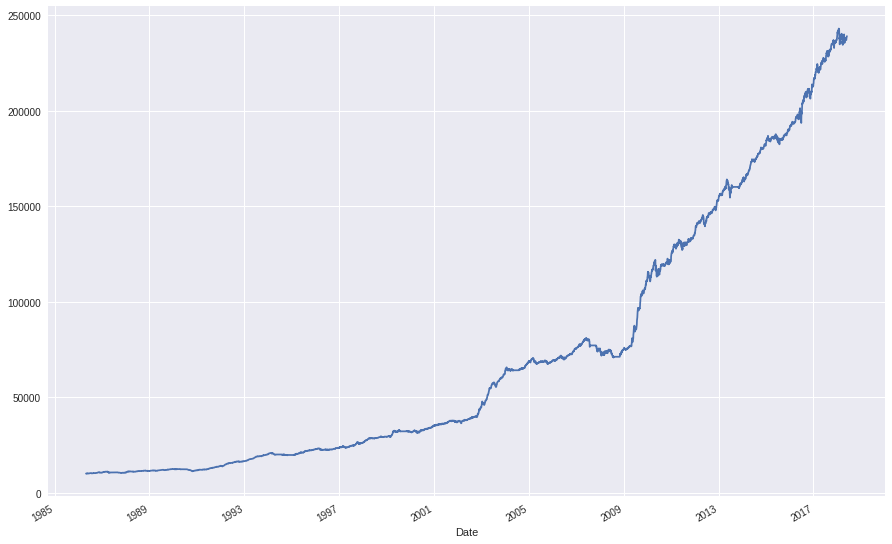

In [13]:
p_value3, p_holdings3, p_weights3, prices3  =  compute_weights_RS_DM ('RS0003', portfolios['RS0003'])
p_value3.plot(figsize=(15, 10), grid=True)

Strategy : DM0001
FIRST BUY DATE = 1986-12-31 00:00:00



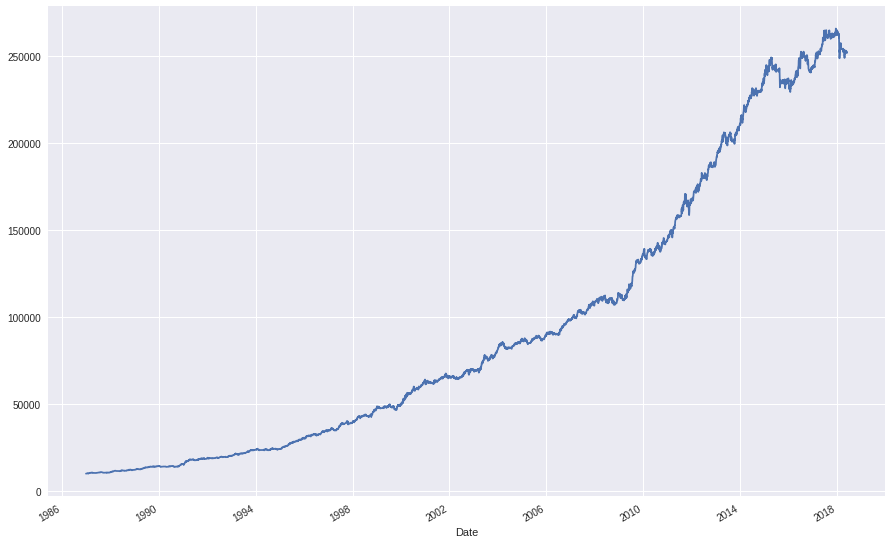

In [14]:
p_value4, p_holdings4, p_weights4, prices4  =  compute_weights_RS_DM ('DM0001', portfolios['DM0001'])
p_value4.plot(figsize=(15, 10), grid=True)

Strategy : DM0002
FIRST BUY DATE = 1986-12-31 00:00:00



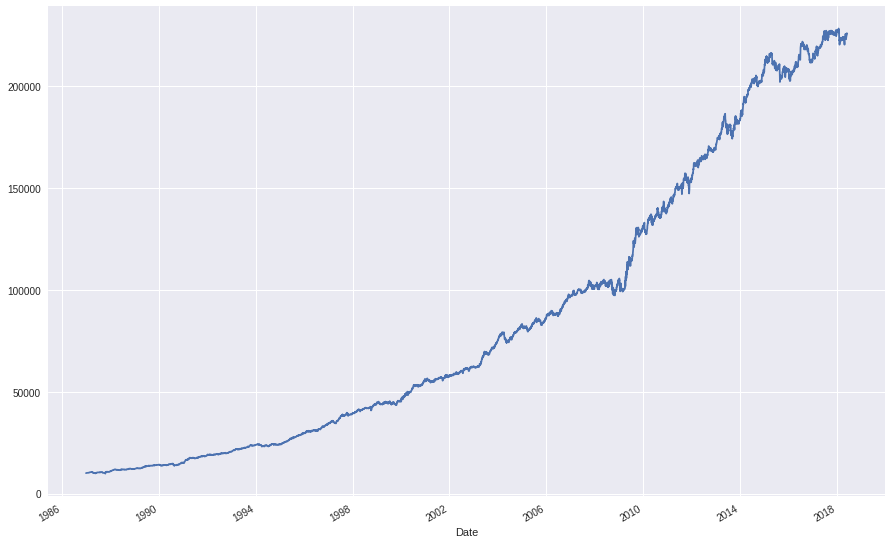

In [15]:
p_value5, p_holdings5, p_weights5, prices5  =  compute_weights_RS_DM ('DM0002', portfolios['DM0002'])
p_value5.plot(figsize=(15, 10), grid=True)

PMA001
FIRST BUY DATE = 1986-08-29 00:00:00



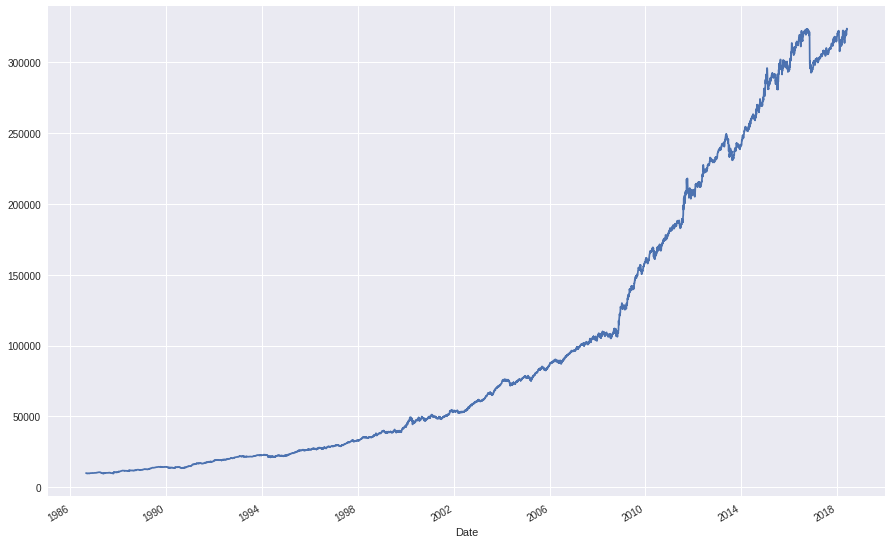

In [16]:
p_value6, p_holdings6, p_weights6, prices6  =  compute_weights_PMA ('PMA001', portfolios['PMA001'])
p_value6.plot(figsize=(15, 10), grid=True)

PMA002
FIRST BUY DATE = 1986-08-29 00:00:00



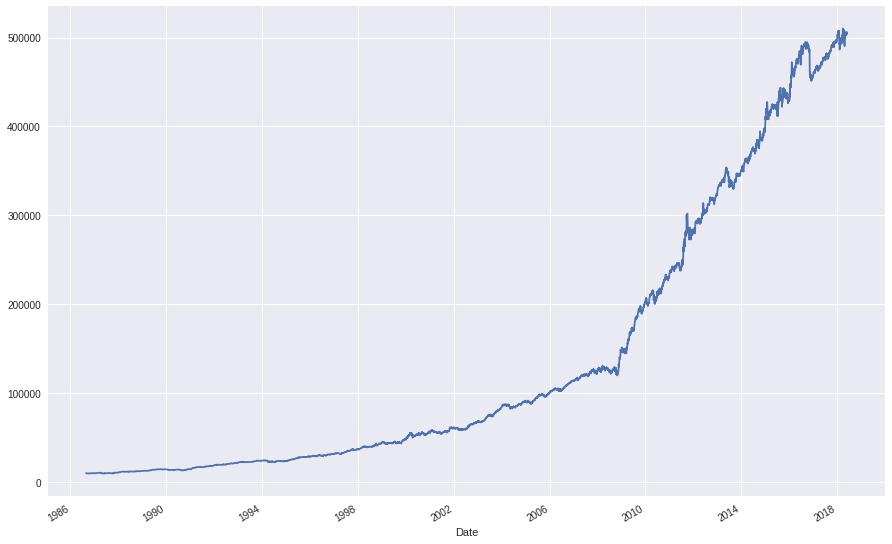

In [17]:
p_value7, p_holdings7, p_weights7, prices7  =  compute_weights_PMA ('PMA002', portfolios['PMA002'])
p_value7.plot(figsize=(15, 10), grid=True)

PMA003
FIRST BUY DATE = 1986-07-31 00:00:00



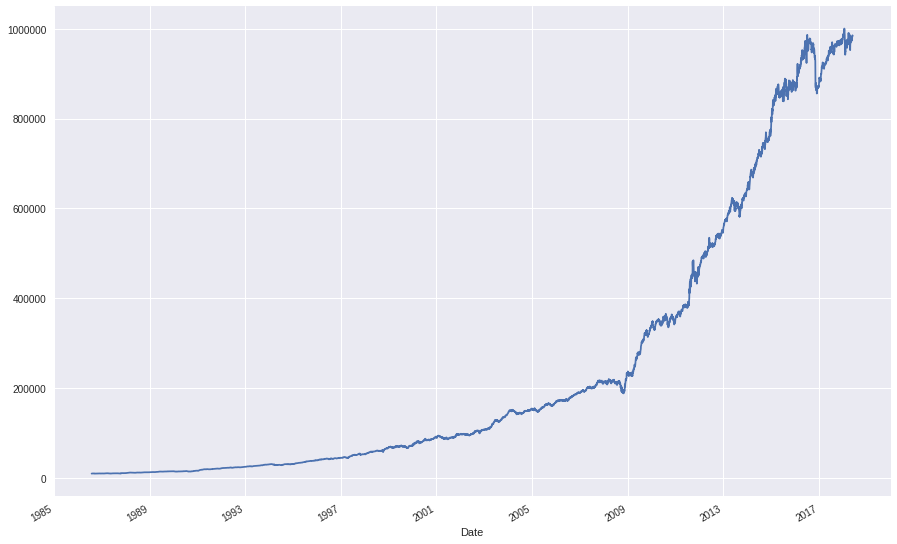

In [18]:
p_value8, p_holdings8, p_weights8, prices8  =  compute_weights_PMA ('PMA003', portfolios['PMA003'])
p_value8.plot(figsize=(15, 10), grid=True)